# Classification on Iris Dataset 

### Importing necessary packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Importing csv file into Dataframe 

In [5]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for null values 

In [7]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

### lets check if we got any outliers by using Box plot

In [6]:
sns.boxplot(x='Name', y='SepalLength', data=df)

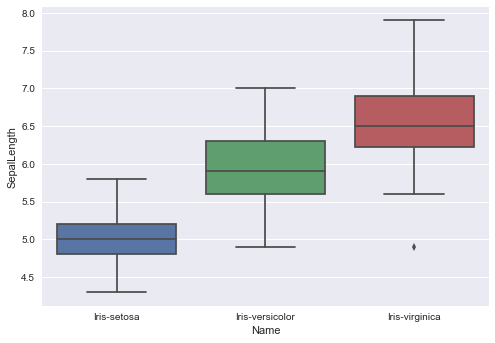

In [9]:
plt.show()

In [10]:
sns.boxplot(x='Name', y='SepalWidth', data=df)

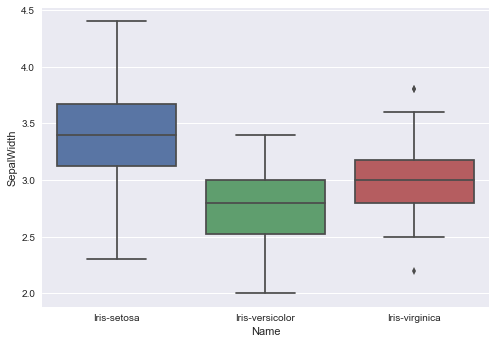

In [11]:
plt.show()

In [12]:
sns.boxplot(x='Name', y='PetalLength', data=df)

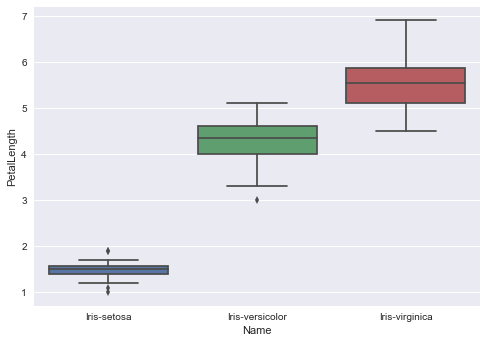

In [13]:
plt.show()

In [14]:
sns.boxplot(x='Name', y='PetalWidth', data=df)

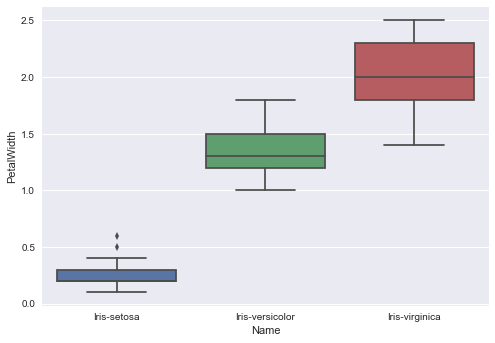

In [15]:
plt.show()

In [16]:
sns.pairplot(df, hue='Name')

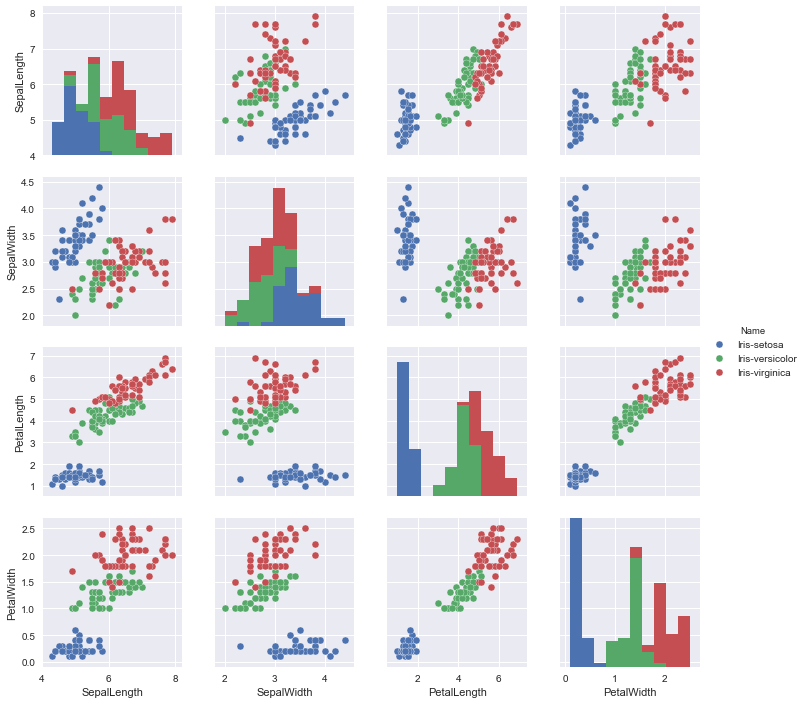

In [17]:
plt.show()

### Correration between the variables 

In [7]:
df.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


In [19]:
corr= df.corr()

In [20]:
sns.heatmap(corr)

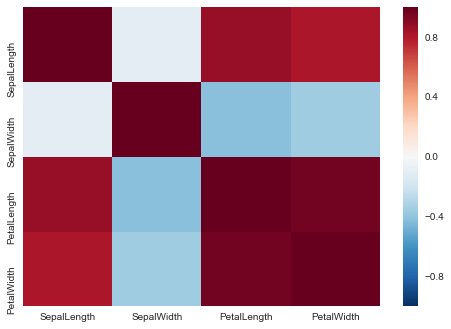

In [21]:
plt.show()

In [22]:
df.head(n=2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


### Preprocessing the data

** We need to change the column 'Name' from categorical to integer type, if not our ML Algorithms don't work properly **

In [9]:
 labelencoder = LabelEncoder()

In [24]:
df['Name']= labelencoder.fit_transform(df['Name'])

In [25]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


** Splitting data into dependent variable as 'y' and all other independent variables as 'X'**

In [26]:
y= df['Name'].values

In [27]:
y.shape

(150,)

In [28]:
X= df.drop(['Name'], axis=1).values

In [31]:
X.shape

(150, 4)

** Scaling plays an important role for building a good model, so lets do that**

In [32]:
scale= StandardScaler()

In [33]:
X= scale.fit_transform(X)

** Spliting the data for Validation**

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

## Applying Machine Learning Classification Algorithms 

## 1. LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_pred = log.predict(X_test)

In [41]:
log.score(X_test,y_test)

0.94736842105263153

** Metrics to Evaluate **

In [42]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 12]])

In [43]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        15\n          1       1.00      0.82      0.90        11\n          2       0.86      1.00      0.92        12\n\navg / total       0.95      0.95      0.95        38\n'

### Tunning Hyper parameters of LogisticRegression

In [45]:
param_grid= {'penalty': ['l1','l2'],
               'C': [0.001,0.01,0.1,1,10,100]}

In [48]:
cv = GridSearchCV(log, param_grid)

In [49]:
cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [50]:
y_predcv= cv.predict(X_test)

In [51]:
cv.score(X_test, y_test)

1.0

In [52]:
cv.best_params_

{'C': 100, 'penalty': 'l2'}

In [53]:
confusion_matrix(y_test, y_predcv)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

### 2. KNN

In [54]:
knn= KNeighborsClassifier()

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
y_pred= knn.predict(X_test)

In [57]:
knn.score(X_test, y_test)

1.0

** Metrics to Evaluate**

In [59]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [60]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        15\n          1       1.00      1.00      1.00        11\n          2       1.00      1.00      1.00        12\n\navg / total       1.00      1.00      1.00        38\n'

### 3. SVM

In [61]:
svm = LinearSVC()

In [62]:
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [63]:
y_pred= svm.predict(X_test)

In [64]:
svm.score(X_test, y_test)

1.0

** Metrics to Evaluate**

In [ ]:


confusion_matrix(y_test, y_pred)

In [66]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        15\n          1       1.00      1.00      1.00        11\n          2       1.00      1.00      1.00        12\n\navg / total       1.00      1.00      1.00        38\n'

### 4. RandomForest 

In [67]:
random = RandomForestClassifier()

In [68]:
random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [69]:
y_pred= random.predict(X_test)

In [71]:
random.score(X_test, y_test)

1.0

** Metrics to Evaluate**

In [72]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [73]:
classification_report(y_test, y_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        15\n          1       1.00      1.00      1.00        11\n          2       1.00      1.00      1.00        12\n\navg / total       1.00      1.00      1.00        38\n'

### Conclusion:
**1. Firstly, When I used Logistic model I only got 94.7% accuracy, but I tried to do parameter tuning and atlast achieved 100% accuracy.**

**2. By using other 3 algorithms I already got best accuracies so haven't done parameter tuning on them.**